# Analyse comparative des données climatique en Isère et Morbihan (1950-2023)

Les données sont accessibles a format csv au lien suivant
https://www.data.gouv.fr/fr/datasets/donnees-climatologiques-de-base-mensuelles/.

Le choix de télécharger les datasets au format csv plutôt que d'utiliser les APIs disponibles a été motivé par le manque de documentation des APIs.

https://www.geeksforgeeks.org/data-analysis-with-python/
sns pairplot
data.corr = correlation (heatmap)


## Formats des données:
Le format des données est documenté au format CSV en bas de la page web des datasets.
Nous nous intéresserons ici au variables suivantes
|nom de variable|description de la variable|
|:-:|:-:|
|NOM_USUEL|nom usuel du poste|
|LAT|latitude|
|LON|longitude|
|ALTI|altitude|
|AAAAMM|Année, mois|
|RR|cumul mensuel des hauteurs de précipitations|
|TX|moyenne mensuelle des températures maximales (TX) quotidiennes (en °C et 1/10)|
|TN|moyenne mensuelle des températures minimales (TN) quotidiennes (en °C et 1/10)|
|TAMPLIM|moyenne mensuelle des amplitudes thermiques (TAMPLI) quotidiennes (en °C et 1/10)|
|TM|moyenne mensuelle des (TN+TX)/2 quotidiennes (en °C et 1/10)|

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

### Données climatiques Isère (1950-2023)

In [2]:
data_clim_is = pd.read_csv("../MENSQ_38_previous-1950-2023.csv", sep=";")

# we only keep columns that we want
data_clim_is = data_clim_is [['NOM_USUEL','LAT','LON','ALTI','AAAAMM','RR','TX','TN','TAMPLIM','TM']]

print(data_clim_is.info())
print(data_clim_is.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64084 entries, 0 to 64083
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NOM_USUEL  64084 non-null  object 
 1   LAT        64084 non-null  float64
 2   LON        64084 non-null  float64
 3   ALTI       64084 non-null  int64  
 4   AAAAMM     64084 non-null  int64  
 5   RR         61240 non-null  float64
 6   TX         30451 non-null  float64
 7   TN         30445 non-null  float64
 8   TAMPLIM    30318 non-null  float64
 9   TM         30309 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 4.9+ MB
None
                LAT           LON          ALTI         AAAAMM            RR  \
count  64084.000000  64084.000000  64084.000000   64084.000000  61240.000000   
mean      45.177045      5.710438    808.098979  198741.259097     94.764311   
std        0.241096      0.329758    512.246530    2081.390131     61.791244   
min       44.746667     

## Données climatiques Morbihan (1950-2023)

In [3]:
data_clim_mo = pd.read_csv("../MENSQ_56_previous-1950-2023.csv", sep=";")

# we only keep columns that we want
data_clim_mo = data_clim_mo [['NOM_USUEL','LAT','LON','ALTI','AAAAMM','RR','TX','TN','TAMPLIM','TM']]

print(data_clim_mo.info())
print(data_clim_mo.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37358 entries, 0 to 37357
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NOM_USUEL  37358 non-null  object 
 1   LAT        37358 non-null  float64
 2   LON        37358 non-null  float64
 3   ALTI       37358 non-null  int64  
 4   AAAAMM     37358 non-null  int64  
 5   RR         37078 non-null  float64
 6   TX         15758 non-null  float64
 7   TN         15758 non-null  float64
 8   TAMPLIM    15758 non-null  float64
 9   TM         15758 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 2.9+ MB
None
                LAT           LON          ALTI         AAAAMM            RR  \
count  37358.000000  37358.000000  37358.000000   37358.000000  37078.000000   
mean      47.811917     -2.912428     77.753226  198955.685315     77.919939   
std        0.216243      0.406783     58.624996    1809.847888     54.524779   
min       47.294333     

## Stations météorologiques différentes

In [4]:
stations = pd.concat([
    data_clim_is[['NOM_USUEL','LAT','LON','ALTI']].drop_duplicates(),
    data_clim_mo[['NOM_USUEL','LAT','LON','ALTI']].drop_duplicates()
    ])

print(stations.info())
print(stations.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 0 to 37304
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NOM_USUEL  322 non-null    object 
 1   LAT        322 non-null    float64
 2   LON        322 non-null    float64
 3   ALTI       322 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 12.6+ KB
None
(322, 4)


In [5]:
print(data_clim_is[data_clim_is.duplicated('AAAAMM')])

                   NOM_USUEL        LAT       LON  ALTI  AAAAMM     RR   TX  \
78        La Jasse Prapoutel  45.300000  5.970000  2000  198702   72.0  NaN   
79        La Jasse Prapoutel  45.300000  5.970000  2000  198703  140.0  NaN   
80        La Jasse Prapoutel  45.300000  5.970000  2000  198704  104.0  NaN   
358                 ALLEMOND  45.203333  6.040333  1270  197201   72.1  NaN   
359                 ALLEMOND  45.203333  6.040333  1270  197202  164.9  NaN   
...                      ...        ...       ...   ...     ...    ...  ...   
64079  Chamrousse Niverolles  45.120667  5.895667  2022  202302    5.1  4.1   
64080  Chamrousse Niverolles  45.120667  5.895667  2022  202303  156.1  5.2   
64081  Chamrousse Niverolles  45.120667  5.895667  2022  202304   37.8  0.0   
64082  Chamrousse Niverolles  45.120667  5.895667  2022  202311    NaN  NaN   
64083  Chamrousse Niverolles  45.120667  5.895667  2022  202312  149.2  NaN   

        TN  TAMPLIM   TM  
78     NaN      NaN  NaN

In [6]:
print(data_clim_is[data_clim_is.duplicated('AAAAMM')])

                   NOM_USUEL        LAT       LON  ALTI  AAAAMM     RR   TX  \
78        La Jasse Prapoutel  45.300000  5.970000  2000  198702   72.0  NaN   
79        La Jasse Prapoutel  45.300000  5.970000  2000  198703  140.0  NaN   
80        La Jasse Prapoutel  45.300000  5.970000  2000  198704  104.0  NaN   
358                 ALLEMOND  45.203333  6.040333  1270  197201   72.1  NaN   
359                 ALLEMOND  45.203333  6.040333  1270  197202  164.9  NaN   
...                      ...        ...       ...   ...     ...    ...  ...   
64079  Chamrousse Niverolles  45.120667  5.895667  2022  202302    5.1  4.1   
64080  Chamrousse Niverolles  45.120667  5.895667  2022  202303  156.1  5.2   
64081  Chamrousse Niverolles  45.120667  5.895667  2022  202304   37.8  0.0   
64082  Chamrousse Niverolles  45.120667  5.895667  2022  202311    NaN  NaN   
64083  Chamrousse Niverolles  45.120667  5.895667  2022  202312  149.2  NaN   

        TN  TAMPLIM   TM  
78     NaN      NaN  NaN

Les données de climat ne sont pas uniques à une date donnée (plusieurs stations au même moment)
Les sommes de données de précipitations ne sont donc pas utilisables pour comparer les deux départements le nombre de stations à l'instant t étant différent.

## Representation sur la carte de France des différentes stations

## Graphiques des températures et précipitations

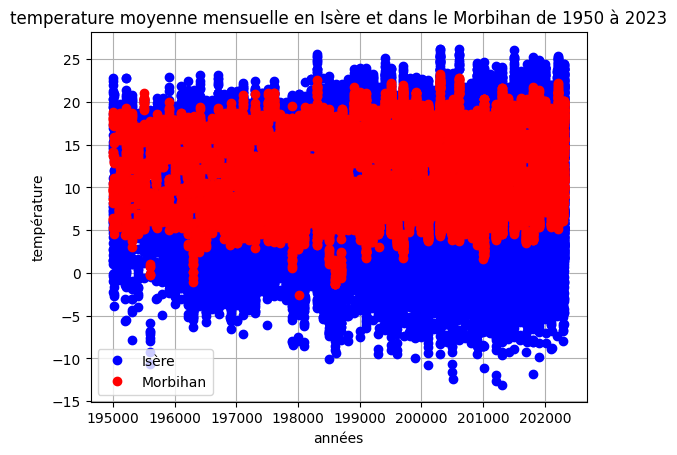

In [7]:
plt.plot(data_clim_is['AAAAMM'], data_clim_is['TM'], 'o', label="Isère", color="blue")
plt.plot(data_clim_mo['AAAAMM'], data_clim_mo['TM'], 'o',label="Morbihan", color="red")
plt.title("temperature moyenne mensuelle en Isère et dans le Morbihan de 1950 à 2023")
plt.legend(loc="lower left")
plt.xlabel("années")
plt.ylabel('température')
plt.grid()
plt.show()

In [8]:
print("mean:")
print("Isère: " + str(data_clim_is['TM'].mean()))
print("Morbihan: " + str(data_clim_mo['TM'].mean()))
print("median:")
print("Isère: " + str(data_clim_is['TM'].median()))
print("Morbihan: " + str(data_clim_mo['TM'].median()))
print("mode:")
print("Isère: " + str(data_clim_is['TM'].mode()))
print("Morbihan: " + str(data_clim_mo['TM'].mode()))
print("\n")
print("variance:")
print("Isère range: [" + str(data_clim_is['TM'].min()) + "," + str(data_clim_is['TM'].max()) + "]")
print("Morbihan range: [" + str(data_clim_mo['TM'].min()) + "," + str(data_clim_mo['TM'].max()) + "]")
print("Isère variance: " + str(data_clim_is['TM'].var()))
print("Morbihan variance: " + str(data_clim_mo['TM'].var()))
print("Isère standard deviation: " + str(data_clim_is['TM'].std()))
print("Morbihan standard deviation: " + str(data_clim_mo['TM'].std()))

mean:
Isère: 8.24228117060939
Morbihan: 12.043907856326944
median:
Isère: 7.7
Morbihan: 11.6
mode:
Isère: 0    3.3
Name: TM, dtype: float64
Morbihan: 0    7.6
Name: TM, dtype: float64


variance:
Isère range: [-13.1,26.2]
Morbihan range: [-2.6,23.3]
Isère variance: 52.15283379569303
Morbihan variance: 21.38347465597559
Isère standard deviation: 7.2216918928802984
Morbihan standard deviation: 4.6242269252249715


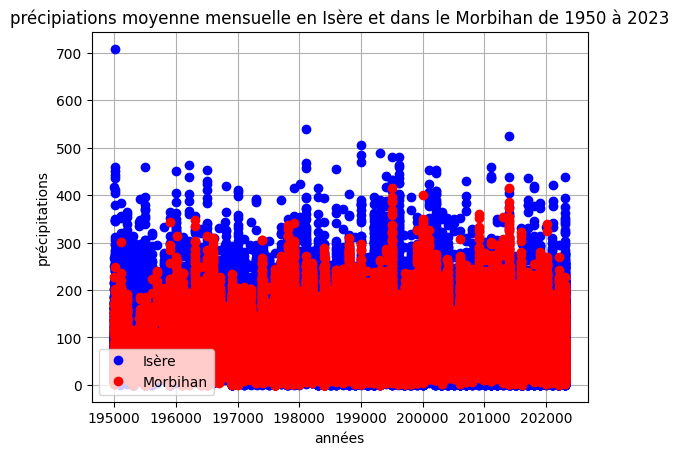

In [9]:
plt.plot(data_clim_is['AAAAMM'], data_clim_is['RR'], 'o', label="Isère", color="blue")
plt.plot(data_clim_mo['AAAAMM'], data_clim_mo['RR'], 'o',label="Morbihan", color="red")
plt.title("précipiations moyenne mensuelle en Isère et dans le Morbihan de 1950 à 2023")
plt.legend(loc="lower left")
plt.xlabel("années")
plt.ylabel('précipitations')
plt.grid()
plt.show()

In [10]:
print("mean:")
print("Isère: " + str(data_clim_is['RR'].mean()))
print("Morbihan: " + str(data_clim_mo['RR'].mean()))
print("median:")
print("Isère: " + str(data_clim_is['RR'].median()))
print("Morbihan: " + str(data_clim_mo['RR'].median()))
print("mode:")
print("Isère: " + str(data_clim_is['RR'].mode()))
print("Morbihan: " + str(data_clim_mo['RR'].mode()))
print("\n")
print("variance:")
print("Isère range: [" + str(data_clim_is['RR'].min()) + "," + str(data_clim_is['RR'].max()) + "]")
print("Morbihan range: [" + str(data_clim_mo['RR'].min()) + "," + str(data_clim_mo['RR'].max()) + "]")
print("Isère variance: " + str(data_clim_is['RR'].var()))
print("Morbihan variance: " + str(data_clim_mo['RR'].var()))
print("Isère standard deviation: " + str(data_clim_is['RR'].std()))
print("Morbihan standard deviation: " + str(data_clim_mo['RR'].std()))

mean:
Isère: 94.76431090790332
Morbihan: 77.91993904741358
median:
Isère: 83.1
Morbihan: 65.85
mode:
Isère: 0    0.0
Name: RR, dtype: float64
Morbihan: 0    38.0
Name: RR, dtype: float64


variance:
Isère range: [0.0,708.1]
Morbihan range: [0.0,415.4]
Isère variance: 3818.157876156049
Morbihan variance: 2972.951532461155
Isère standard deviation: 61.79124433247844
Morbihan standard deviation: 54.52477906843048


## Moyennage des données par année
Pour gommer la variabilité saisonnière moyennage des données par année pour étudier la tendance sur la période

In [ ]:
data_clim_is['AAAA'] = data_clim_is['AAAAMM'].apply(lambda x : int(str(x)[0:4]))
data_clim_y_is = data_clim_is.groupby('AAAA', as_index=False).agg(
    avg_RR = ('RR', 'mean'),
    avg_TX = ('TX', 'mean'),
    avg_TN = ('TN', 'mean'),
    avg_TAMPLIM = ('TAMPLIM', 'mean'),
    avg_TM = ('TM', 'mean')
    )
data_clim_y_is.head()

,AAAA,avg_RR,avg_TX,avg_TN,avg_TAMPLIM,avg_TM
0,1950,88.812500,15.283721,3.767442,11.445349,9.493023
1,1951,114.407215,15.276344,4.408602,10.868817,9.843011
2,1952,101.331669,14.887671,2.831507,12.050685,8.861644
3,1953,66.785426,16.282716,3.318519,12.966667,9.793827
4,1954,104.349809,14.988095,3.201190,11.791667,9.089286


In [36]:
data_clim_mo['AAAA'] = data_clim_mo['AAAAMM'].apply(lambda x : int(str(x)[:4]))
data_clim_y_mo = data_clim_mo.groupby('AAAA', as_index=False).agg(
    avg_RR = ('RR', 'mean'),
    avg_TX = ('TX', 'mean'),
    avg_TN = ('TN', 'mean'),
    avg_TAMPLIM = ('TAMPLIM', 'mean'),
    avg_TM = ('TM', 'mean')
    )
data_clim_y_mo.head()


,AAAA,avg_RR,avg_TX,avg_TN,avg_TAMPLIM,avg_TM
0,1950,60.987745,14.982979,9.761702,5.212766,12.370213
1,1951,100.355941,14.871667,8.805000,6.073333,11.846667
2,1952,76.960417,15.147222,8.281944,6.869444,11.712500
3,1953,45.058333,15.454167,8.379167,7.072222,11.922222
4,1954,65.703571,14.550000,8.173611,6.377778,11.372222


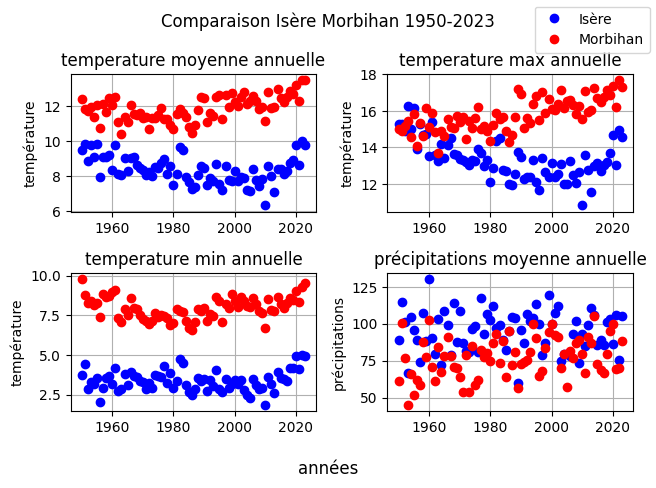

In [56]:
fig,ax = plt.subplots(2,2)

ax[0][0].plot(data_clim_y_is['AAAA'], data_clim_y_is['avg_TM'], 'o', label="Isère", color="blue")
ax[0][0].plot(data_clim_y_mo['AAAA'], data_clim_y_mo['avg_TM'], 'o',label="Morbihan", color="red")
ax[0][0].set_title("temperature moyenne annuelle")
ax[0][0].set_ylabel('température')
ax[0][0].grid()

ax[0][1].plot(data_clim_y_is['AAAA'], data_clim_y_is['avg_TX'], 'o', label="Isère", color="blue")
ax[0][1].plot(data_clim_y_mo['AAAA'], data_clim_y_mo['avg_TX'], 'o',label="Morbihan", color="red")
ax[0][1].set_title("temperature max annuelle")
ax[0][1].set_ylabel('température')
ax[0][1].grid()

ax[1][0].plot(data_clim_y_is['AAAA'], data_clim_y_is['avg_TN'], 'o', label="Isère", color="blue")
ax[1][0].plot(data_clim_y_mo['AAAA'], data_clim_y_mo['avg_TN'], 'o',label="Morbihan", color="red")
ax[1][0].set_title("temperature min annuelle")
ax[1][0].set_ylabel('température')
ax[1][0].grid()

ax[1][1].plot(data_clim_y_is['AAAA'], data_clim_y_is['avg_RR'], 'o', label="Isère", color="blue")
ax[1][1].plot(data_clim_y_mo['AAAA'], data_clim_y_mo['avg_RR'], 'o',label="Morbihan", color="red")
ax[1][1].set_title("précipitations moyenne annuelle")
ax[1][1].set_ylabel('précipitations')
ax[1][1].grid()

fig.suptitle("Comparaison Isère Morbihan 1950-2023")
fig.legend(["Isère", "Morbihan"], loc = "upper right")
fig.supxlabel('années')
fig.tight_layout()

plt.show()

Regardons la tendance sur 5 ans (running avg) de l'évolution des temperatures moyennes annuelles

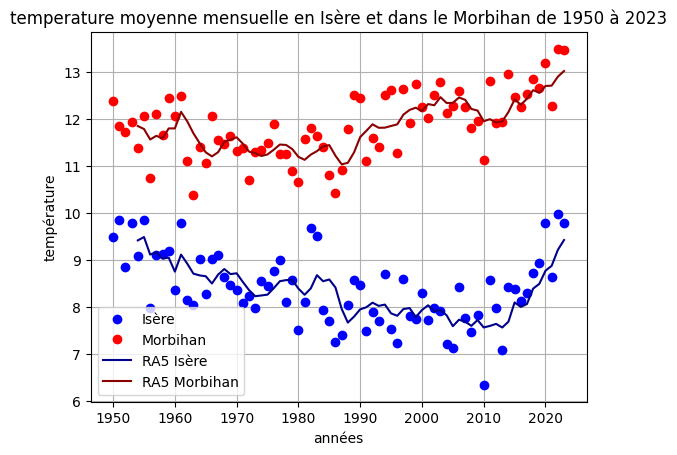

In [63]:
data_clim_y_is['TM_RA5'] = data_clim_y_is['avg_TM'].rolling(window=5).mean()
data_clim_y_mo['TM_RA5'] = data_clim_y_mo['avg_TM'].rolling(window=5).mean()
plt.plot(data_clim_y_is['AAAA'], data_clim_y_is['avg_TM'], 'o', label="Isère", color="blue")
plt.plot(data_clim_y_mo['AAAA'], data_clim_y_mo['avg_TM'], 'o',label="Morbihan", color="red")
plt.plot(data_clim_y_is['AAAA'], data_clim_y_is['TM_RA5'], label="RA5 Isère", color="darkblue")
plt.plot(data_clim_y_mo['AAAA'], data_clim_y_mo['TM_RA5'], label="RA5 Morbihan", color="darkred")
plt.title("temperature moyenne mensuelle en Isère et dans le Morbihan de 1950 à 2023")
plt.legend(loc="lower left")
plt.xlabel("années")
plt.ylabel('température')
plt.grid()
plt.show()